## Results

In [2]:
accuracy_data = {
    'MFCC': {
        'SVM': 0.78,
        'GMM': 0.1495,
        'MLP': 0.7477,
        'XGBoost': 0.7009,
        'LightGBM': 0.73,
        'Multi-Branch NN': 0.76,
        'Ensemble': 0.9458
    },
    'Word-Level': {
        'SVM': 0.53,
        'GMM': 0.1308,
        'MLP': 0.5234,
        'XGBoost': 0.52,
        'LightGBM': 0.50,
        'Multi-Branch NN': 0.50,
        'Ensemble': 0.8548
    },
    'Syllable-Level': {
        'SVM': 0.43,
        'GMM': 0.1776,
        'MLP': 0.3458,
        'XGBoost': 0.45,
        'LightGBM': 0.40,
        'Multi-Branch NN': 0.40,
        'Ensemble': 0.8860
    },
    'Utterance-Level': {
        'SVM': 0.48,
        'GMM': 0.0654,
        'MLP': 0.4766,
        'XGBoost': 0.36,
        'LightGBM': 0.40,
        'Multi-Branch NN': 0.49,
        'Ensemble': 0.7570
    }
}


In [4]:
import pandas as pd

df = pd.DataFrame(accuracy_data).T

df

,SVM,GMM,MLP,XGBoost,LightGBM,Multi-Branch NN,Ensemble
MFCC,0.78,0.1495,0.7477,0.7009,0.73,0.76,0.9458
Word-Level,0.53,0.1308,0.5234,0.5200,0.50,0.50,0.8548
Syllable-Level,0.43,0.1776,0.3458,0.4500,0.40,0.40,0.8860
Utterance-Level,0.48,0.0654,0.4766,0.3600,0.40,0.49,0.7570


### Plot accuracies

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a modern style
sns.set(style="whitegrid", font_scale=1.1)

def plot_model_accuracies(accuracy_dict):
    palette = sns.color_palette("pastel")  # Soft color palette

    for feature_type, model_scores in accuracy_dict.items():
        models = list(model_scores.keys())
        scores = list(model_scores.values())

        plt.figure(figsize=(10, 6))
        bars = sns.barplot(x=models, y=scores, palette=palette)

        # Annotate bars
        for i, bar in enumerate(bars.patches):
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 0.015,
                f"{bar.get_height():.2f}",
                ha='center',
                va='bottom',
                fontsize=12,
                fontweight='bold',
                color='black'
            )

        # Styling
        plt.ylim(0, 1)
        plt.title(f"Model Accuracy Comparison - {feature_type}", fontsize=16, fontweight='bold', color='navy')
        plt.ylabel("Accuracy", fontsize=13, weight='bold')
        plt.xlabel("Model", fontsize=13, weight='bold')
        plt.xticks(rotation=15, fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()


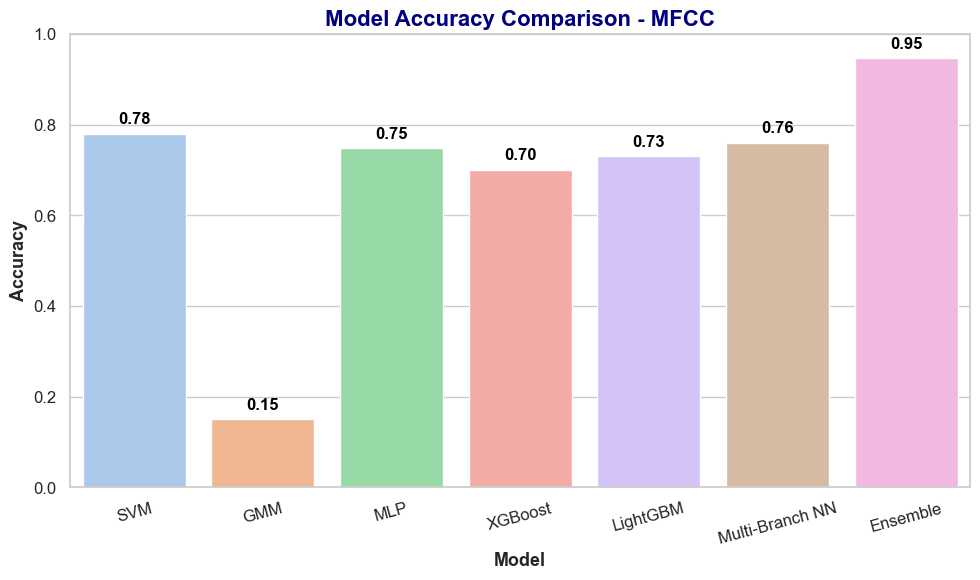

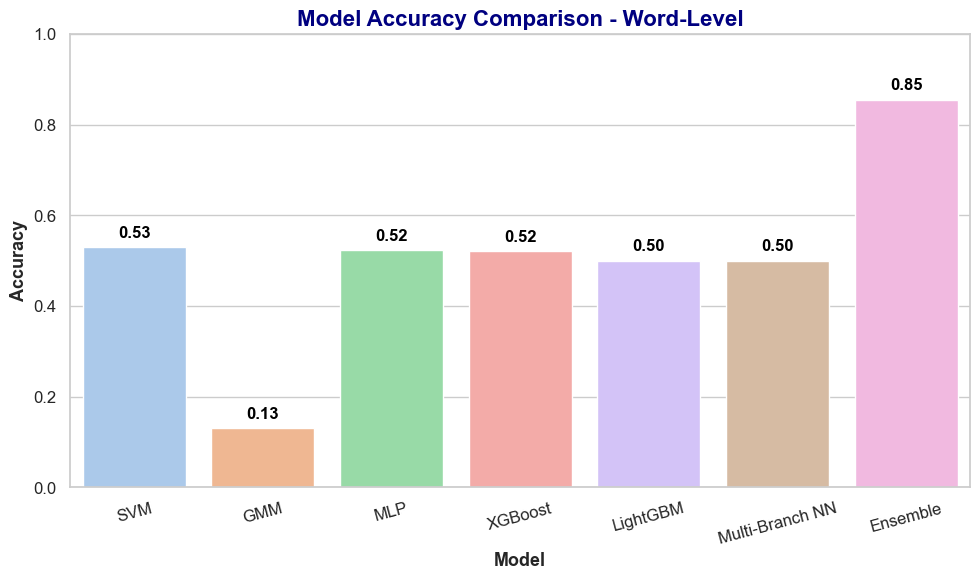

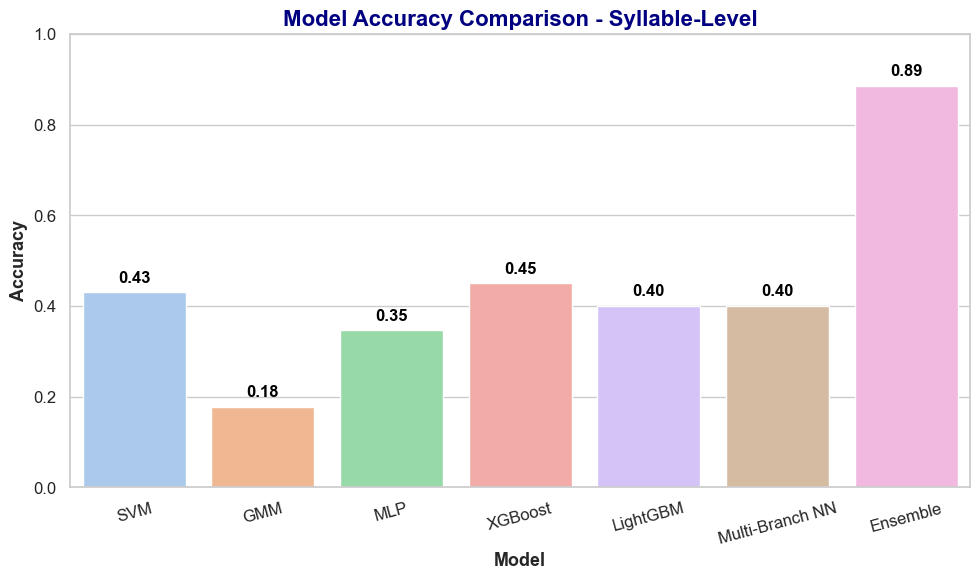

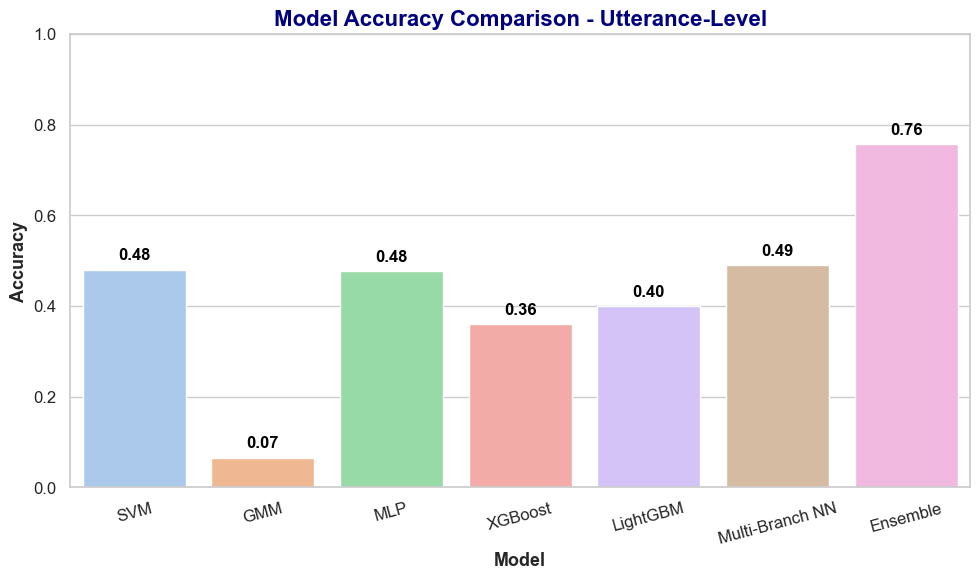

In [ ]:
plot_model_accuracies(accuracy_data)


### features Across models

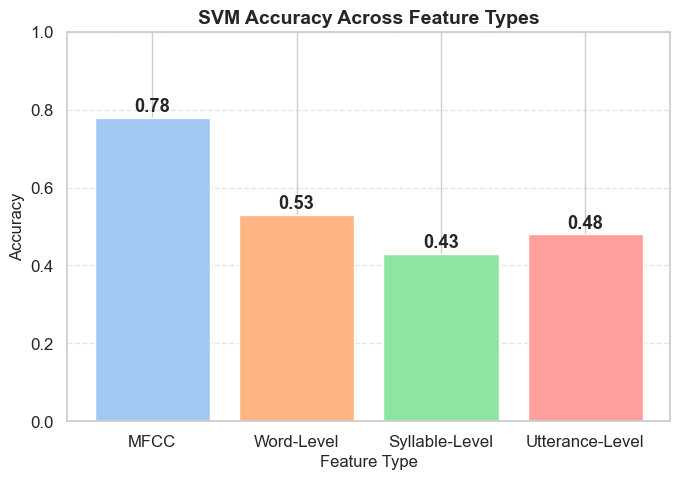

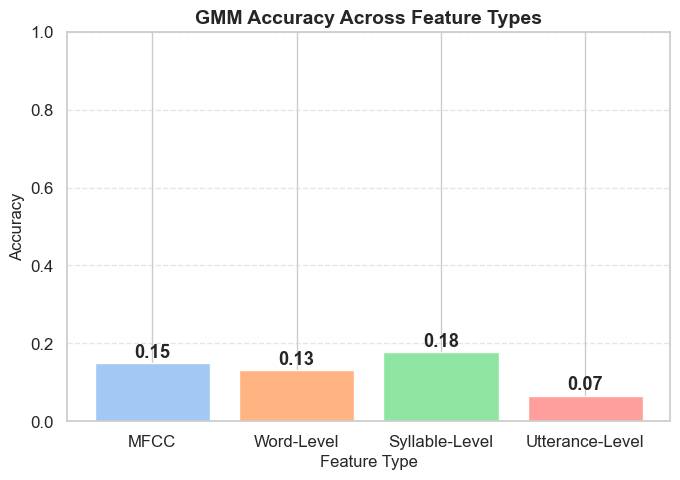

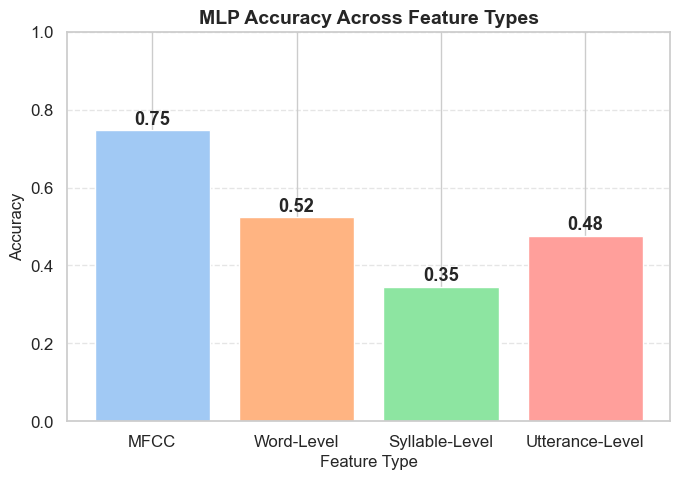

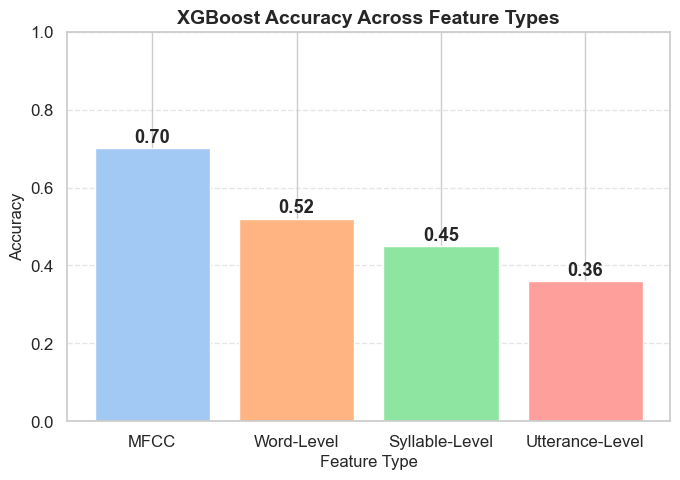

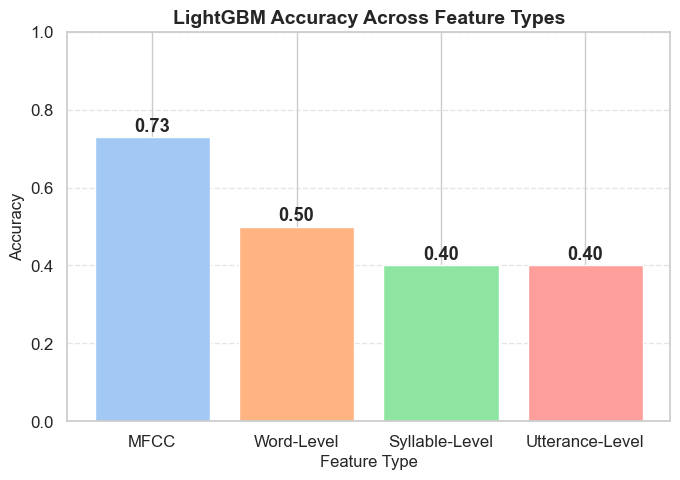

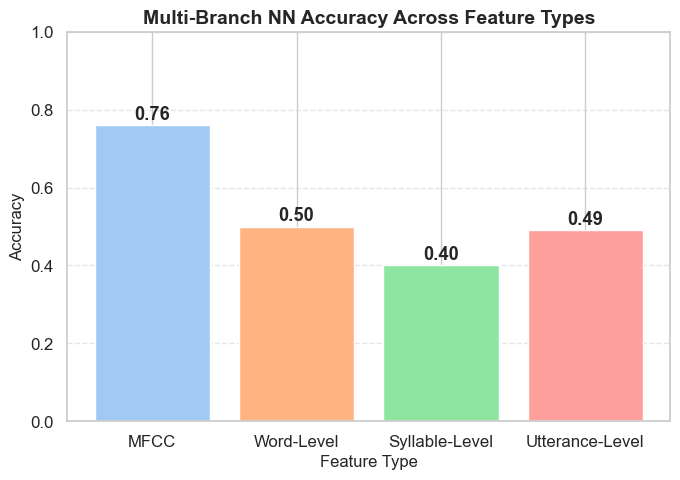

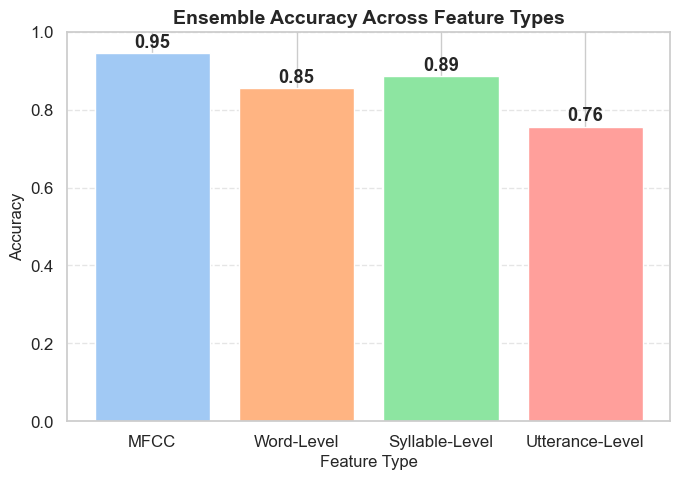

In [ ]:
import matplotlib.pyplot as plt

def plot_feature_comparison(accuracy_data):
    feature_levels = list(accuracy_data.keys())
    model_types = list(next(iter(accuracy_data.values())).keys())

    for model in model_types:
        accuracies = [accuracy_data[feature][model] for feature in feature_levels]

        plt.figure(figsize=(7, 5))
        plt.bar(feature_levels, accuracies, color=sns.color_palette("pastel"))
        plt.title(f"{model} Accuracy Across Feature Types", fontsize=14, weight='bold')
        plt.ylim(0, 1)
        plt.ylabel("Accuracy", fontsize=12)
        plt.xlabel("Feature Type", fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.5)

        for i, acc in enumerate(accuracies):
            plt.text(i, acc + 0.015, f"{acc:.2f}", ha='center', fontweight='bold')

        plt.tight_layout()
        plt.show()

plot_feature_comparison(accuracy_data)

### Aggregate Scores per feature type

In [ ]:
avg_per_feature = {
    feature: sum(model_acc.values()) / len(model_acc)
    for feature, model_acc in accuracy_data.items()
}

print("🔍 Average Accuracy Per Feature Type:")
for f, acc in avg_per_feature.items():
    print(f"{f}: {acc:.4f}")


🔍 Average Accuracy Per Feature Type:
MFCC: 0.6877
Word-Level: 0.5084
Syllable-Level: 0.4413
Utterance-Level: 0.4327


### Radar Chart

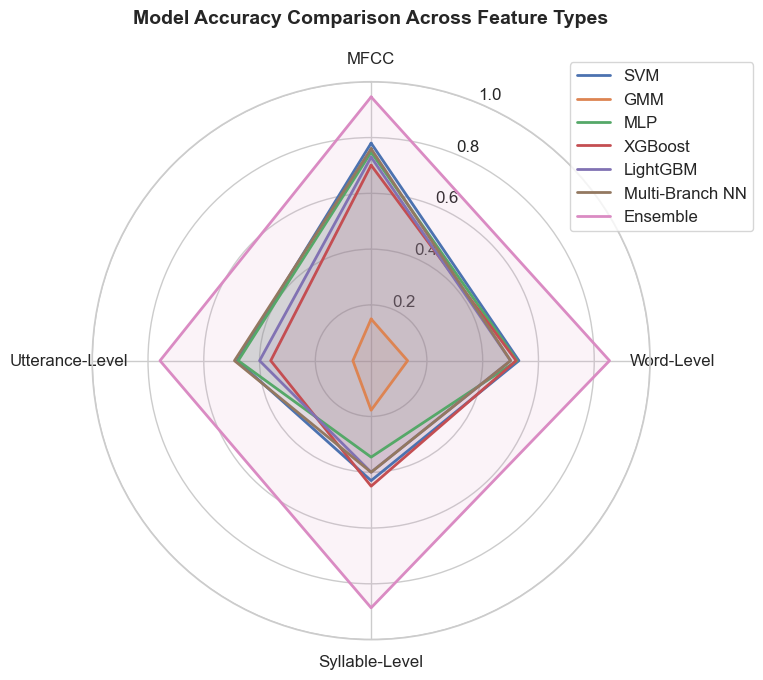

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_radar_chart(accuracy_data):
    feature_types = list(accuracy_data.keys())
    model_types = list(next(iter(accuracy_data.values())).keys())
    num_features = len(feature_types)

    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle

    plt.figure(figsize=(10, 7))
    ax = plt.subplot(111, polar=True)

    for model in model_types:
        values = [accuracy_data[feature][model] for feature in feature_types]
        values += values[:1]  # loop back to start
        ax.plot(angles, values, label=model, linewidth=2)
        ax.fill(angles, values, alpha=0.1)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), feature_types)

    ax.set_title("Model Accuracy Comparison Across Feature Types", fontsize=14, fontweight='bold', pad=20)
    ax.set_ylim(0, 1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))
    plt.tight_layout()
    plt.show()

plot_radar_chart(accuracy_data)


### Friedman Test

In [ ]:
from scipy.stats import friedmanchisquare

# Transpose the accuracy data to have rows = models, cols = features
model_names = list(next(iter(accuracy_data.values())).keys())
features = list(accuracy_data.keys())

# Gather scores in model-wise format
model_scores = []
for model in model_names:
    model_scores.append([accuracy_data[feature][model] for feature in features])

# Apply Friedman test
stat, p = friedmanchisquare(*model_scores)

print("📊 Friedman Test Results:")
print(f"Chi-Square Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("✅ Significant difference in model performance across feature types.")
else:
    print("⚠️ No statistically significant difference found.")


📊 Friedman Test Results:
Chi-Square Statistic: 18.7027
P-value: 0.0047
✅ Significant difference in model performance across feature types.
